In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/research/Hyundai/codes
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch_geometric
!pip install -U kaleido
import random
import matplotlib.pyplot as plt
import numpy as np
import utils
import trainer
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive
/content/drive/MyDrive/research/Hyundai/codes
2.5.1+cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.5 MB/s eta 0:00:00


In [ ]:
class objectview(object):
    def __init__(self, d):
        self.__dict__ = d

for args in [
        {'num_layers': 25,
         'batch_size': 2,
         'hidden_dim': 32,
         'epochs': 1,
         'seed':42,
         'opt': 'adam',
         'opt_scheduler': 'none',
         'opt_restart': 0,
         'weight_decay': 5e-4,
         'lr': 0.001,
         'train_size': 107,
         'test_size': 28,
         'test_interval': 1,
         'plot_interval': 1,
         'device':'cuda',
         'shuffle': True,
         'save_best_model': False,
         'checkpoint_dir': "checkpoint/",
         },
    ]:
        args = objectview(args)
dataset_full_timesteps = torch.load("dataset_pt/dataset5_135samples_withload_outerindex_107_28.pt")
dataset = dataset_full_timesteps[:args.train_size+args.test_size]
if args.shuffle:
    random.shuffle(dataset)

stats_list = utils.get_stats(dataset)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
args.device = device
print(device)

cuda


Training:   0%|          | 0/2 [00:00<?, ?Epochs/s]


0.00251451347555433
train loss: 0.95  test loss: 0.93


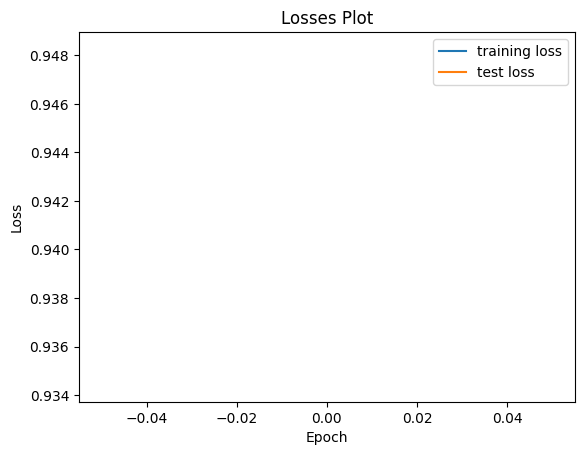

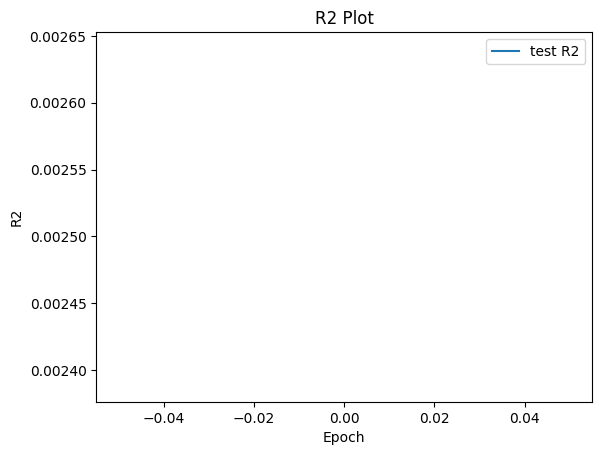

Training:  50%|█████     | 1/2 [05:29<05:29, 329.80s/Epochs]


0.13048077481133596
train loss: 0.84  test loss: 0.88


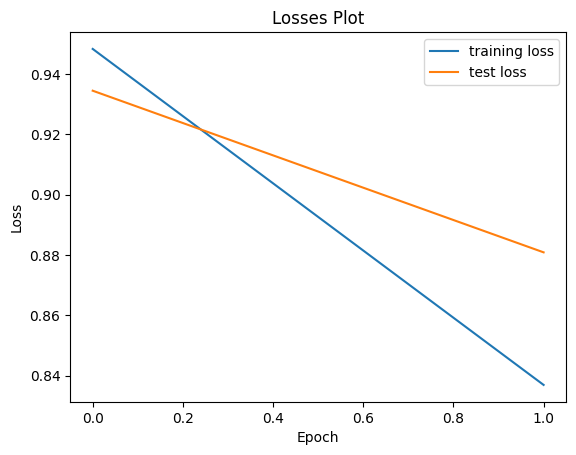

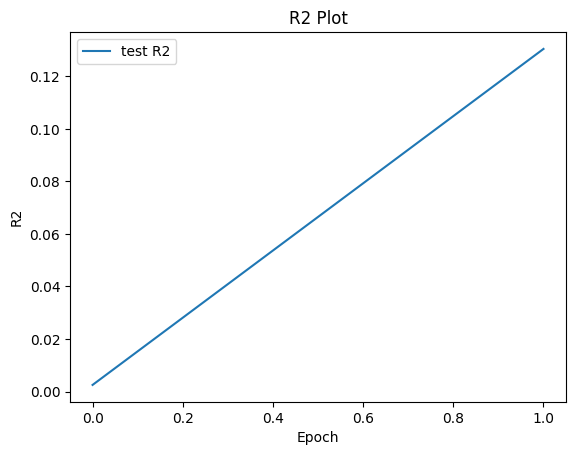

Training:  50%|█████     | 1/2 [08:38<08:38, 518.62s/Epochs]


KeyboardInterrupt: 

In [ ]:
test_losses, test_r2, losses, best_model, best_test_loss, test_loader, test_distributions = trainer.train(dataset, device, stats_list, args)

In [ ]:
torch.save({"prediction_unnormalize": prediction_unnormalize.cpu(),
            "data_stress": data_stress.cpu(),
            "pos": pos.cpu(),
            "faces": faces.cpu()}, "test_distribution.pth")

In [2]:
loaded = torch.load("s_42_nl_25_bs_2_hd_32_ep_200_wd_0/8.pth")

In [7]:
loaded["pos"].shape

torch.Size([55839, 6])

In [ ]:
a=loaded["pos"][:, 0]
b=loaded["pos"][:, 1]
c=loaded["pos"][:, 2]

d=loaded["faces"][:, 0]
e=loaded["faces"][:, 1]
f=loaded["faces"][:, 2]

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=1, cols=3, horizontal_spacing=0.01,
    specs=[[{'type': 'scene'},{'type': 'scene'},{'type': 'scene'}]])

color="Jet"

maxx=loaded["data_stress"].max().item()
minn=loaded["data_stress"].min().item()
scale_=0.9
y_=0.5

# adding surfaces to subplots.
fig.add_trace(
    go.Mesh3d(
        x=a,y=b,z=c,
        colorbar_title='stress',
        cmax=maxx,
        cmin=minn,
        colorscale=color,
        intensity=loaded["data_stress"].numpy().tolist(),
        i=d,j=e,k=f,name='y1',showscale=True, colorbar=dict(x=0.29, y=y_, len=scale_)),row=1, col=1)

fig.add_trace(
    go.Mesh3d(
        x=a,y=b,z=c,
        colorbar_title='stress',
        cmax=maxx,
        cmin=minn,
        colorscale=color,
        intensity=loaded["prediction_unnormalize"].numpy().tolist(),
        i=d,j=e,k=f,name='y1',showscale=True, colorbar=dict(x=0.63, y=y_, len=scale_)),row=1, col=2)

fig.add_trace(
    go.Mesh3d(
        x=a,y=b,z=c,
        colorbar_title='stress',
        cmax=maxx,
        cmin=-maxx,
        colorscale=color,
        intensity=(loaded["data_stress"]-loaded["prediction_unnormalize"]).numpy().tolist(),
        i=d,j=e,k=f,name='y1',showscale=True, colorbar=dict(x=0.97, y=y_, len=scale_)),row=1, col=3)


fig.update_scenes(aspectmode='data')
fig.update_traces(lightposition_x=0, lightposition_y=0, lightposition_z=2)
fig.update_scenes(camera_eye_x=0, camera_eye_y=0, camera_eye_z=2)
fig.update_scenes(xaxis_showticklabels=False, yaxis_showticklabels=False, zaxis_showticklabels=False)
fig.update_scenes(xaxis_title_text='', yaxis_title_text='',zaxis_title_text='')
fig.update_scenes(xaxis_visible=False, yaxis_visible=False,zaxis_visible=False )

fig.update_layout(height=400, width=1000, title_text="Side By Side Subplots", showlegend=False)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

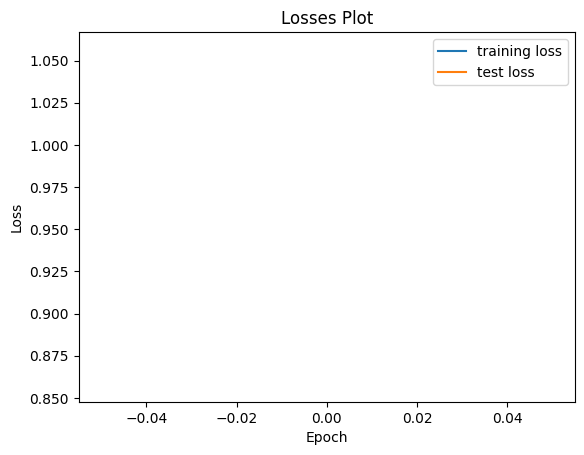

In [ ]:
f = plt.figure()
plt.title('Losses Plot')
plt.plot(losses, label="training loss" )
x=np.array(list(range(len(test_losses))))*10
plt.plot(x.tolist(),test_losses, label="test loss")

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.show()

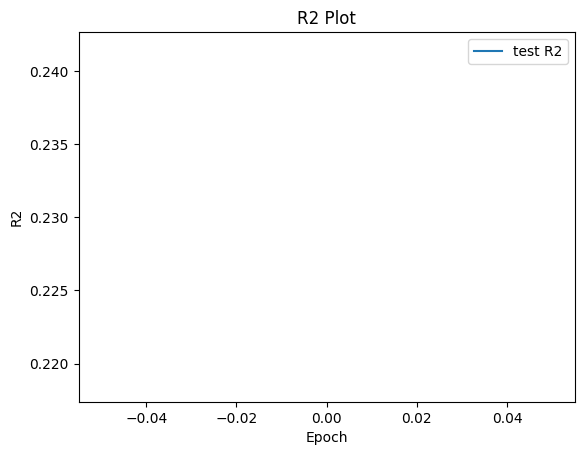

In [ ]:
f = plt.figure()
plt.title('R2 Plot')
x=np.array(list(range(len(test_r2))))*5
plt.plot(x.tolist(),test_r2, label="test R2")

plt.xlabel('Epoch')
plt.ylabel('R2')

plt.legend()
plt.show()